# Lab 14 pre-work

In [55]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [56]:
input_file = '../data/data_singlevar_regr.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_test_predict = linear_regressor.predict(X_test)

## Visualization

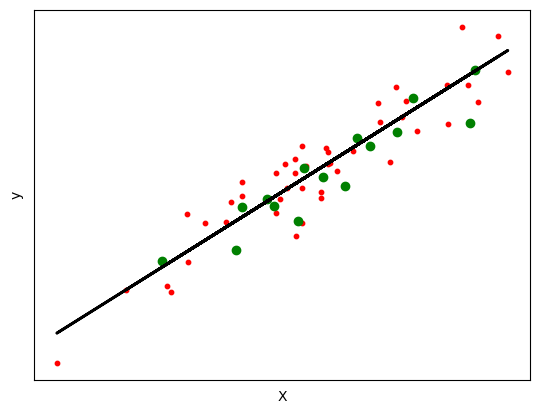

In [57]:
plt.scatter(X_train, y_train, color='r', s=10)
plt.scatter(X_test, y_test, color='g')

Y_pred = linear_regressor.predict(X)

plt.plot(X, Y_pred, color='k', linewidth=2)

plt.xticks(())
plt.yticks(())
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [58]:
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_predict), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_predict), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_predict), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_predict), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_predict), 2))

Linear regressor performance:
Mean absolute error = 0.54
Mean squared error = 0.5
Median absolute error = 0.34
Explain variance score = 0.87
R2 score = 0.84


## Export training model to file with help of `pickle`

In [59]:
output_model_file = 'saved_model.pkl'
with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

## Import training model dump with help of `pickle`

In [60]:
with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)

y_train_predict_new = model_linregr.predict(X_train)
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_train, y_train_predict_new), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_train, y_train_predict_new), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_train, y_train_predict_new), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_train, y_train_predict_new), 2))
print("R2 score =", round(sm.r2_score(y_train, y_train_predict_new), 2))

Linear regressor performance:
Mean absolute error = 0.68
Mean squared error = 0.67
Median absolute error = 0.71
Explain variance score = 0.87
R2 score = 0.87
